**Absenteeism_AtWork_Data**

In [5]:
#libraries required

import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import math
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
#reading the data

df = pd.read_csv('DS_C12_S3_Clustering_AbsenteeismAtWork_Data.csv', sep=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [7]:
df.shape

(740, 21)

In [8]:
#checking null values

df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### No null values found.

In [9]:
df.drop(['ID'], axis = 1, inplace = True)

In [10]:
df.duplicated().sum()

34

In [11]:
#dropped all the duplicates

df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
#data type of the feature

df.dtypes

Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [14]:
#dividing the features into categorical and numerical 

from tabulate import tabulate
def data_type(df):
    cat=[]
    num=[]
    for col in df:
        if df[col].nunique()<14:
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat_var,num_var=data_type(df)
print(tabulate({'Categorical':cat_var,'Numerical':num_var},headers=['Categorical','Numerical']))

Categorical           Numerical
--------------------  -------------------------------
Month of absence      Reason for absence
Day of the week       Transportation expense
Seasons               Distance from Residence to Work
Hit target            Service time
Disciplinary failure  Age
Education             Work load Average/day
Son                   Weight
Social drinker        Height
Social smoker         Body mass index
Pet                   Absenteeism time in hours


In [15]:
def cat_info(col):
    print(f'Unique values in {col} :{df[col].nunique()}')
    print(f'Missing values count for {col} : {df[col].isnull().sum()}')
    print(f'Mode of {col} : {df[col].mode()[0]}')
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100

    
def visual(col):
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(5,3))
    plt.bar(value_count.index,value_count.values)
    plt.title(f'Value count of {col}')
    
    plt.figure(figsize=(5,3))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')
    plt.title(f'Percentage of {col}')
def main_cat(col):   
    cat_info(col)
    visual(col)

Unique values in Month of absence :13
Missing values count for Month of absence : 0
Mode of Month of absence : 3


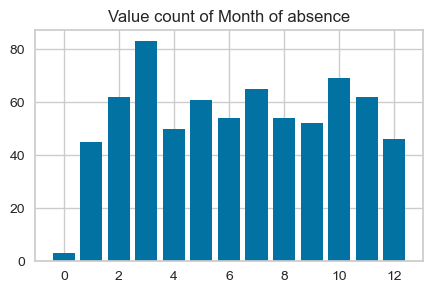

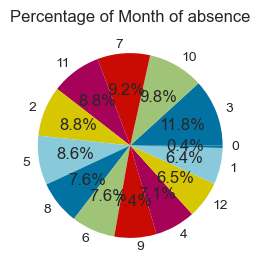

In [16]:
main_cat('Month of absence')

**In 3rd Month there is high percentage of Absence**

Unique values in Day of the week :5
Missing values count for Day of the week : 0
Mode of Day of the week : 2


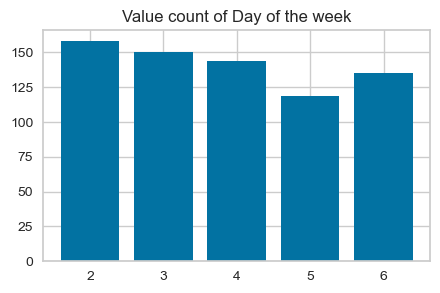

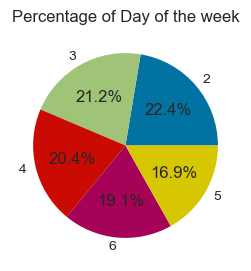

In [17]:
main_cat('Day of the week')

Unique values in Seasons :4
Missing values count for Seasons : 0
Mode of Seasons : 4


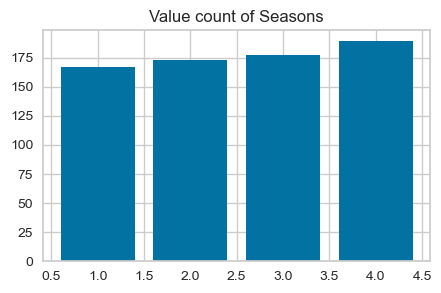

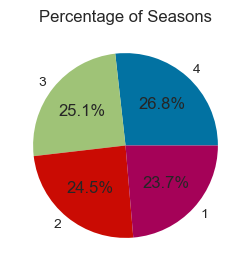

In [18]:
main_cat('Seasons')

Unique values in Hit target :13
Missing values count for Hit target : 0
Mode of Hit target : 93


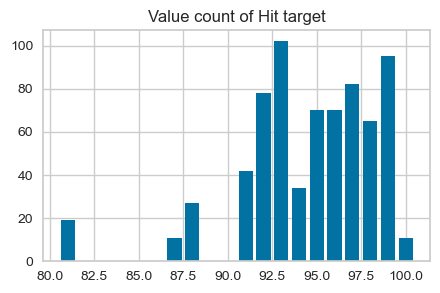

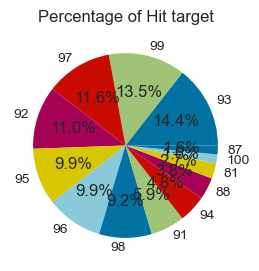

In [19]:
main_cat('Hit target')

Unique values in Disciplinary failure :2
Missing values count for Disciplinary failure : 0
Mode of Disciplinary failure : 0


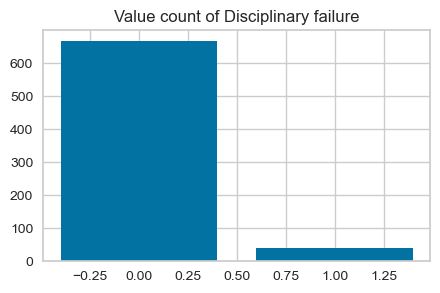

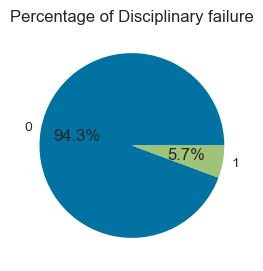

In [20]:
main_cat("Disciplinary failure")

Unique values in Education :4
Missing values count for Education : 0
Mode of Education : 1


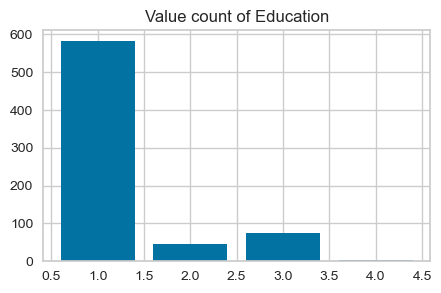

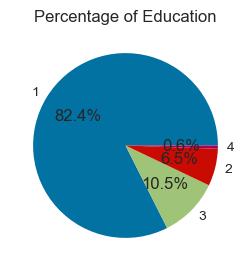

In [21]:
main_cat("Education")

Unique values in Son :5
Missing values count for Son : 0
Mode of Son : 0


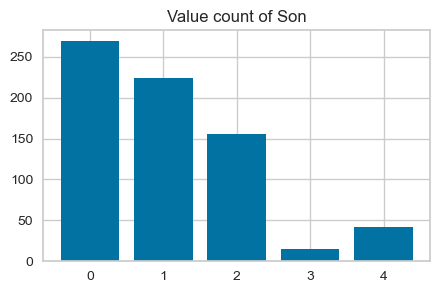

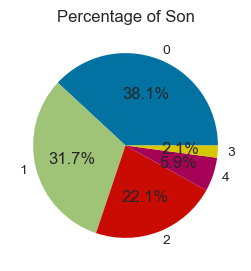

In [22]:
main_cat('Son')

Unique values in Social drinker :2
Missing values count for Social drinker : 0
Mode of Social drinker : 1


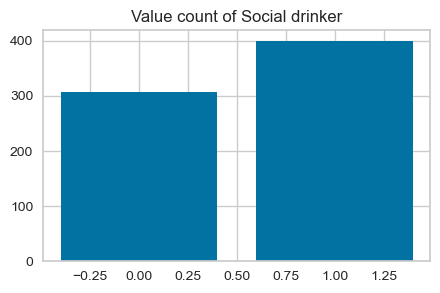

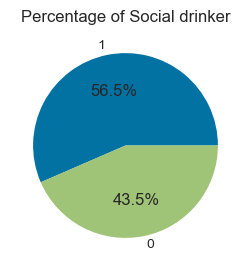

In [23]:
main_cat('Social drinker')

Unique values in Social smoker :2
Missing values count for Social smoker : 0
Mode of Social smoker : 0


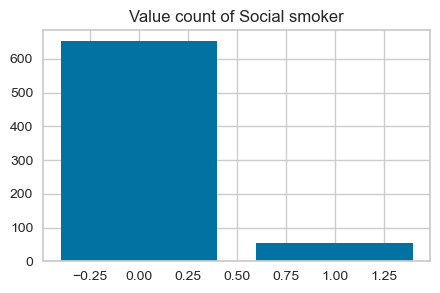

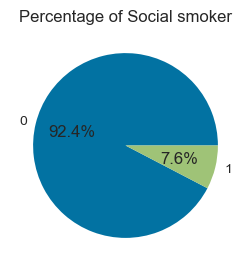

In [24]:
main_cat('Social smoker')

Unique values in Pet :6
Missing values count for Pet : 0
Mode of Pet : 0


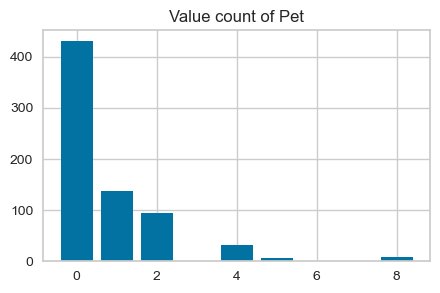

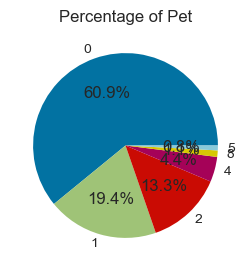

In [25]:
main_cat('Pet')

In [26]:
def num_info(col):
    print(col)
    print(f'skewness {df[col].skew()}')
    print(f'kurtos {df[col].kurt()}')
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(6,7))
    ax[0].hist(df[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=df[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')
def num_vis(col):
    num_info(col)
    num_visual(col)

Reason for absence
skewness -0.8558788174215977
kurtos -0.3675392288660779


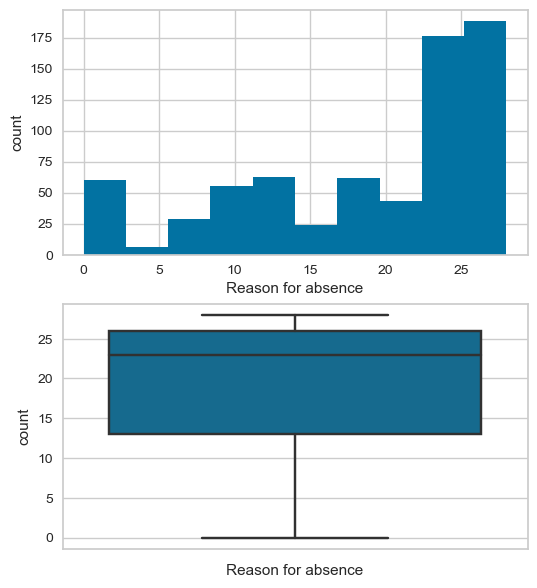

In [27]:
num_vis('Reason for absence')

Transportation expense
skewness 0.3543664363530157
kurtos -0.3560953324203533


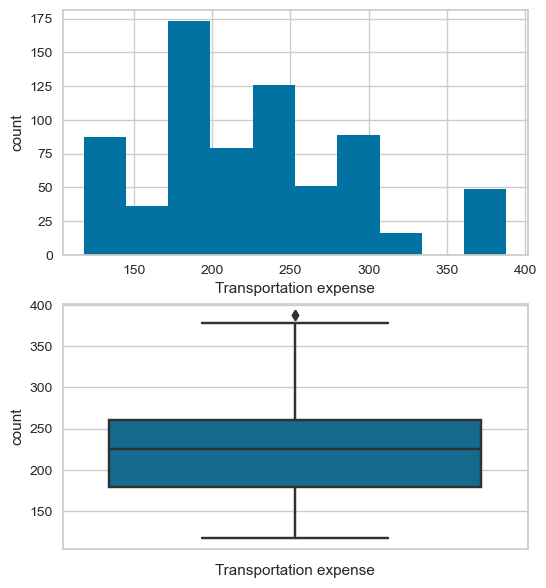

In [28]:
num_vis('Transportation expense')

Distance from Residence to Work
skewness 0.3460837888556063
kurtos -1.2162595597875014


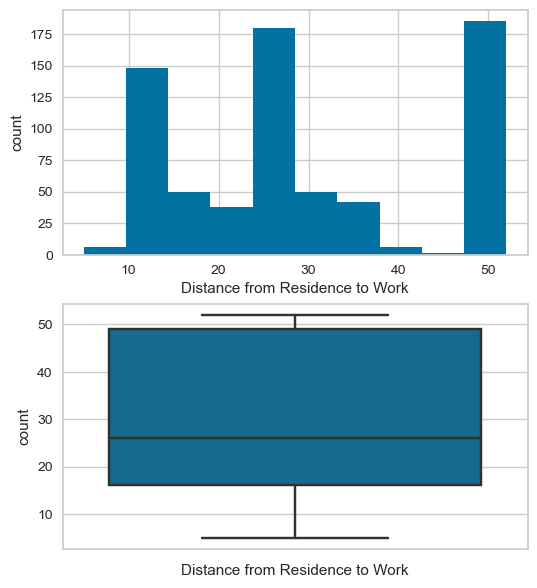

In [29]:
num_vis('Distance from Residence to Work')

Service time
skewness 0.014263041593152363
kurtos 0.8163517982339519


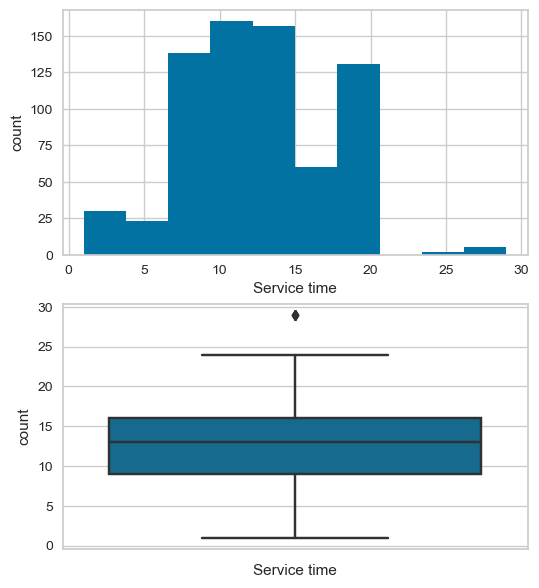

In [30]:
num_vis('Service time')

Age
skewness 0.7075468792011788
kurtos 0.3763597870471478


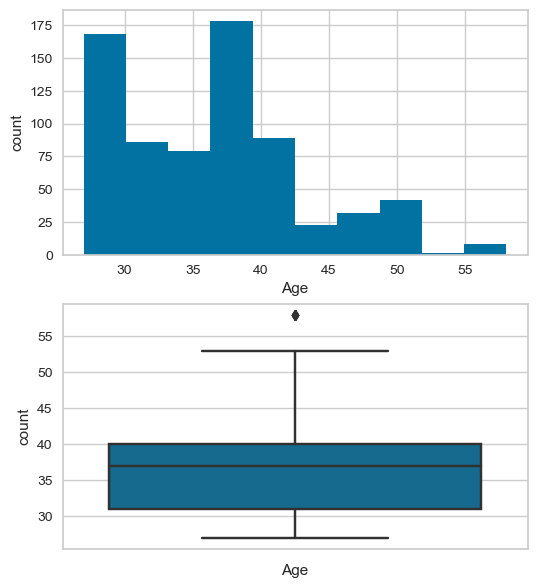

In [31]:
num_vis('Age')

Work load Average/day 
skewness 0.9437670800517695
kurtos 0.5561609517149546


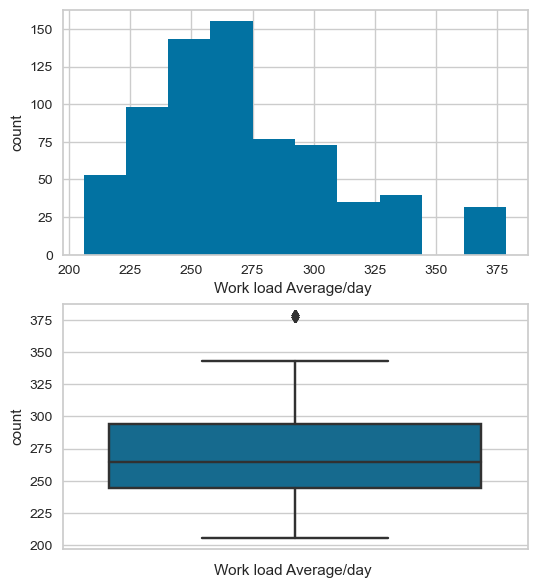

In [32]:
num_vis('Work load Average/day ')

Weight
skewness 0.05180693033613901
kurtos -0.9208851532648272


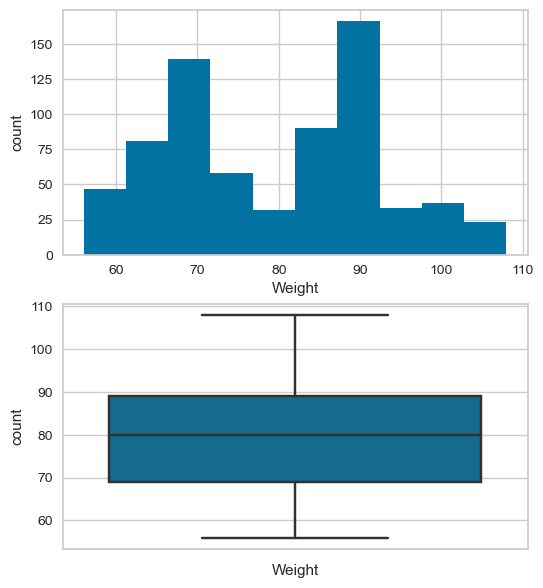

In [33]:
num_vis('Weight')

Height
skewness 2.49017301340818
kurtos 6.821665219730978


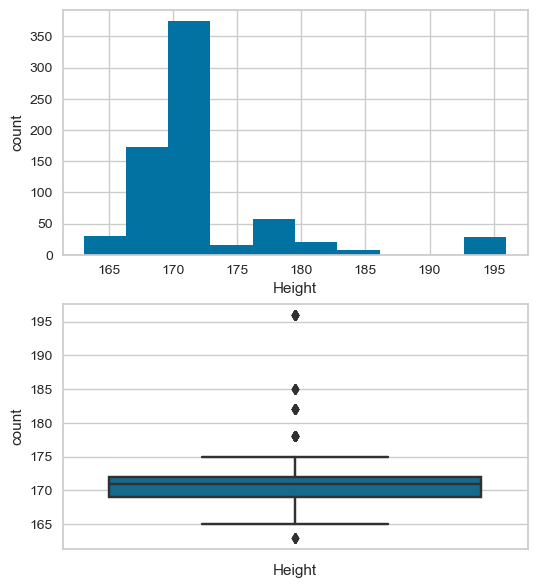

In [34]:
num_vis('Height')

Body mass index
skewness 0.3526579014048029
kurtos -0.26710985746416416


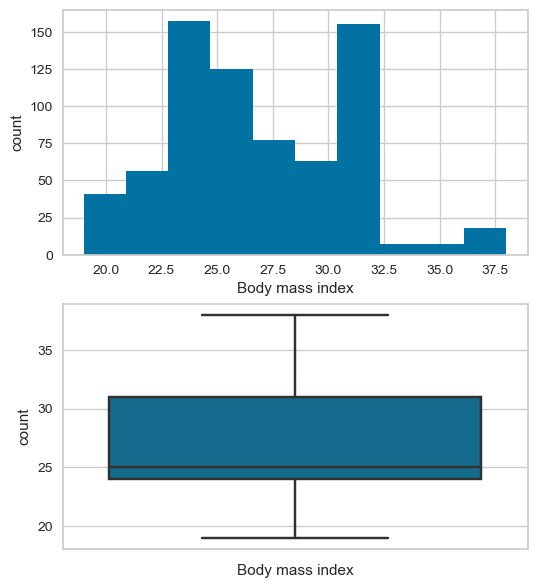

In [35]:
num_vis('Body mass index')

Absenteeism time in hours
skewness 5.592091419335404
kurtos 36.98327554013165


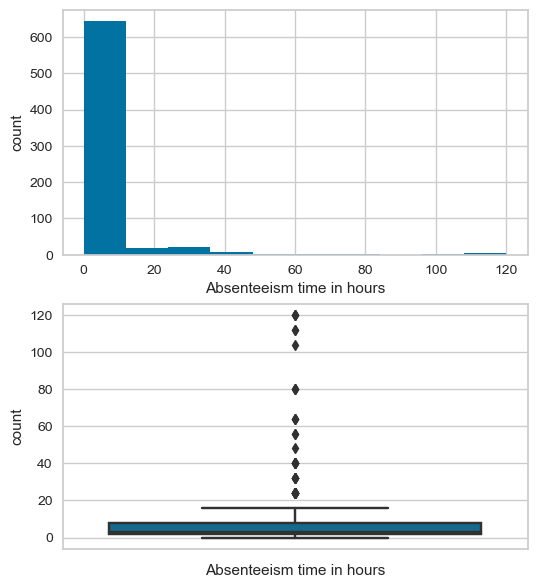

In [36]:
num_vis('Absenteeism time in hours')

### BI & Multi-Variate Analysis

Text(0.5, 1.0, 'Absent time with Social smoker')

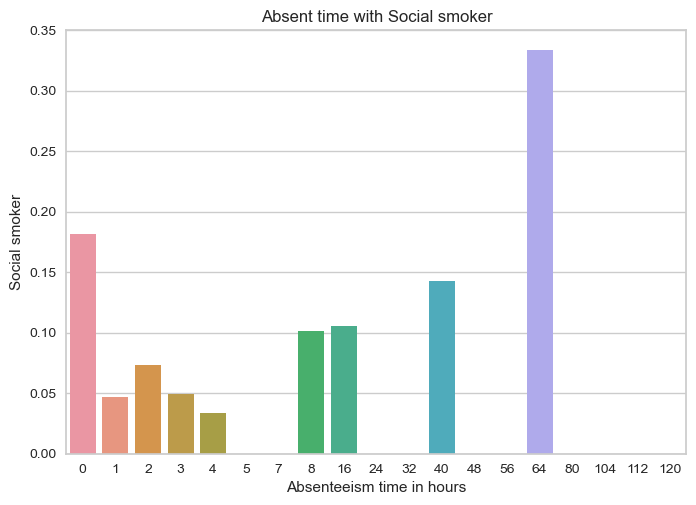

In [37]:
sns.barplot(y='Social smoker',x='Absenteeism time in hours',data=df,ci=None)
plt.title('Absent time with Social smoker')

Text(0.5, 1.0, 'Absent time with respect to Month')

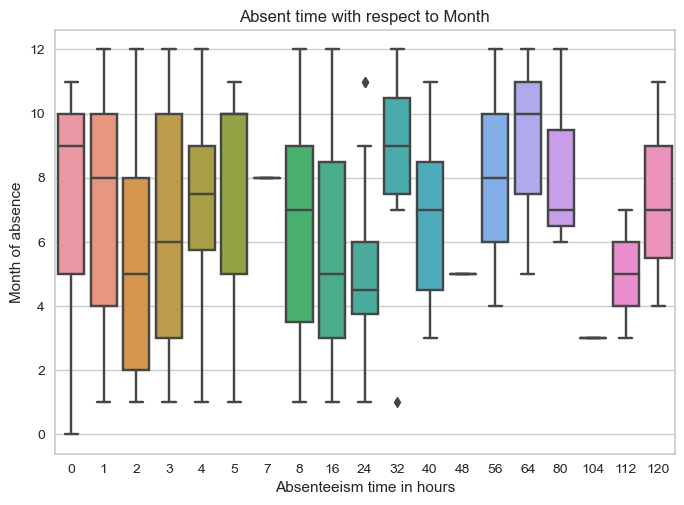

In [38]:
sns.boxplot(y='Month of absence',x='Absenteeism time in hours',data=df)
plt.title('Absent time with respect to Month')

Text(0.5, 1.0, 'Absent time in Seasons')

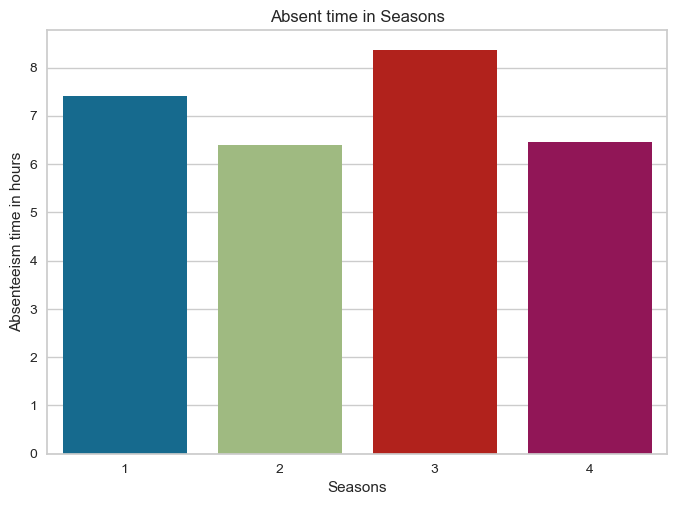

In [39]:
sns.barplot(x='Seasons',y='Absenteeism time in hours',data=df,ci=None)
plt.title('Absent time in Seasons')

Text(0.5, 1.0, 'Reason with Absent time ')

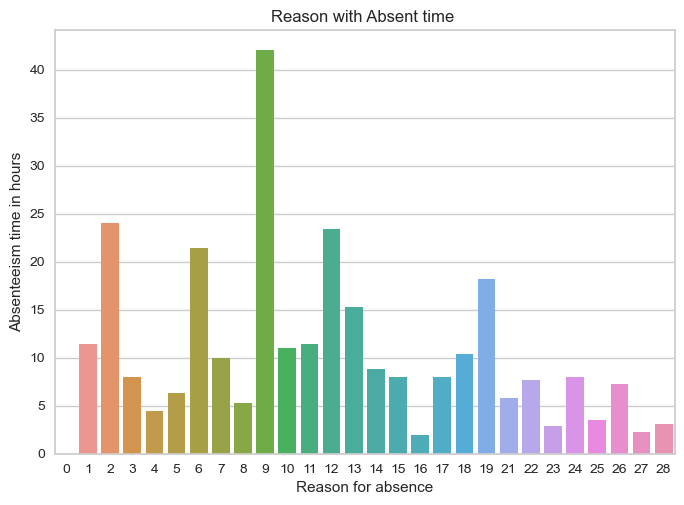

In [40]:
sns.barplot(x='Reason for absence',y='Absenteeism time in hours',data=df,ci=None)
plt.title('Reason with Absent time ')

Feature Scaling:

In [41]:
num_cat = ['float64', 'int64']
num_df  = df.select_dtypes(include=num_cat)
scaler = StandardScaler()
scale_df = pd.DataFrame(normalize(scaler.fit_transform(num_df)), columns=num_df.columns)
scale_df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.281948,0.058154,-0.210019,-0.464283,0.329686,0.153146,0.038773,-0.178104,-0.277077,0.216595,-0.082293,-0.146015,0.285653,0.294547,-0.096637,0.058186,0.287226,-0.011050,0.265674,-0.077613
1,-0.350781,0.027272,-0.098492,-0.217733,-0.245835,-0.174633,0.198481,0.324645,-0.129940,0.101576,0.642570,-0.068476,-0.008688,0.138133,-0.045320,-0.090902,0.232713,0.148317,0.161629,-0.082719
2,0.141294,0.050376,0.022271,-0.402188,-0.190231,0.429559,0.366626,0.067468,-0.240019,0.187627,-0.071287,-0.126486,-0.279545,0.255153,-0.083713,-0.167910,0.226180,-0.104084,0.298554,-0.110014
3,-0.279846,0.034574,0.155434,-0.276032,0.166321,-0.330068,0.068766,0.076744,-0.164731,0.128773,-0.048926,-0.086811,0.169830,0.175118,0.693706,-0.115241,-0.170941,-0.136302,-0.123768,-0.046144
4,0.164642,0.058700,0.263896,-0.468649,0.332786,0.154586,0.039137,-0.179779,-0.279682,0.218632,-0.083067,-0.147388,0.288338,0.297317,-0.097546,0.058733,0.289927,-0.011153,0.268172,-0.128194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,-0.209605,0.063024,-0.227607,-0.503166,0.357297,0.165972,0.042020,-0.193020,-0.069090,-0.148218,-0.089185,-0.158243,0.309575,0.319215,-0.104731,0.063059,0.311281,-0.011975,0.287924,0.022933
702,-0.249269,0.046424,-0.167660,-0.370641,0.047927,-0.333755,0.092336,0.021304,-0.050893,-0.109180,-0.065696,0.682414,-0.014790,-0.305605,-0.077146,0.046450,0.187583,-0.008821,0.149044,-0.061959
703,-0.312545,-0.264371,-0.087756,-0.193999,-0.219038,-0.146050,0.016201,0.075329,-0.003099,0.016679,-0.034386,-0.061012,-0.007741,0.123076,-0.040380,0.761454,0.207346,-0.050206,0.243009,-0.073703
704,-0.513411,-0.434278,0.017647,-0.113023,0.027498,0.089435,0.079391,0.088601,-0.005091,0.027398,-0.056485,-0.100223,0.196069,0.202174,-0.066331,0.212922,0.376467,-0.082472,0.453395,-0.121070


In [42]:
corel_matrix = scale_df.corr()
corel_matrix

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Reason for absence,1.000000,-0.026293,0.084663,-0.076959,-0.051098,0.149438,0.057816,-0.030680,-0.124927,0.047608,-0.421156,-0.104845,-0.035149,0.085262,-0.110766,-0.021969,0.006784,-0.110114,0.053329,-0.245591
Month of absence,-0.026293,1.000000,0.002286,0.405128,0.111169,-0.011453,-0.047685,0.016734,-0.178491,-0.471004,0.070006,-0.039520,0.062321,0.052707,-0.037029,0.036627,0.010940,-0.056558,0.030423,0.013095
Day of the week,0.084663,0.002286,1.000000,0.045355,0.074688,0.091615,0.003272,0.010849,0.062180,0.043113,-0.014045,0.018191,0.107639,0.063822,0.018423,-0.001284,-0.134255,-0.056403,-0.122803,-0.110643
Seasons,-0.076959,0.405128,0.045355,1.000000,0.027937,-0.054240,-0.034951,-0.012386,0.172641,-0.080399,0.100950,-0.022653,0.026638,-0.049661,-0.048970,0.055399,-0.075475,-0.050242,-0.052831,0.008710
Transportation expense,-0.051098,0.111169,0.074688,0.027937,1.000000,0.229007,-0.289687,-0.187513,0.017557,-0.078512,0.058507,-0.039488,0.443238,0.259292,0.000947,0.393147,-0.206089,-0.158831,-0.160553,0.074686
Distance from Residence to Work,0.149438,-0.011453,0.091615,-0.054240,0.229007,1.000000,0.271739,-0.089153,-0.045801,-0.003394,-0.041722,-0.279808,0.075909,0.533290,-0.079674,0.094215,0.030895,-0.324035,0.173361,-0.030757
Service time,0.057816,-0.047685,0.003272,-0.034951,-0.289687,0.271739,1.000000,0.654965,-0.030242,0.010621,-0.000025,-0.171550,-0.090620,0.468184,0.077317,-0.468309,0.461124,-0.052202,0.510292,0.019693
Age,-0.030680,0.016734,0.010849,-0.012386,-0.187513,-0.089153,0.654965,1.000000,-0.058624,-0.021599,0.077419,-0.153140,0.003969,0.297232,0.113945,-0.354024,0.391724,-0.019389,0.434944,0.032339
Work load Average/day,-0.124927,-0.178491,0.062180,0.172641,0.017557,-0.045801,-0.030242,-0.058624,1.000000,-0.053708,0.013586,-0.061046,0.025521,-0.021502,0.022332,0.043408,-0.079579,0.066045,-0.114758,0.076060
Hit target,0.047608,-0.471004,0.043113,-0.080399,-0.078512,-0.003394,0.010621,-0.021599,-0.053708,1.000000,-0.106572,0.081364,-0.038069,-0.082169,0.030180,-0.018980,-0.023465,0.050967,-0.044243,-0.011637


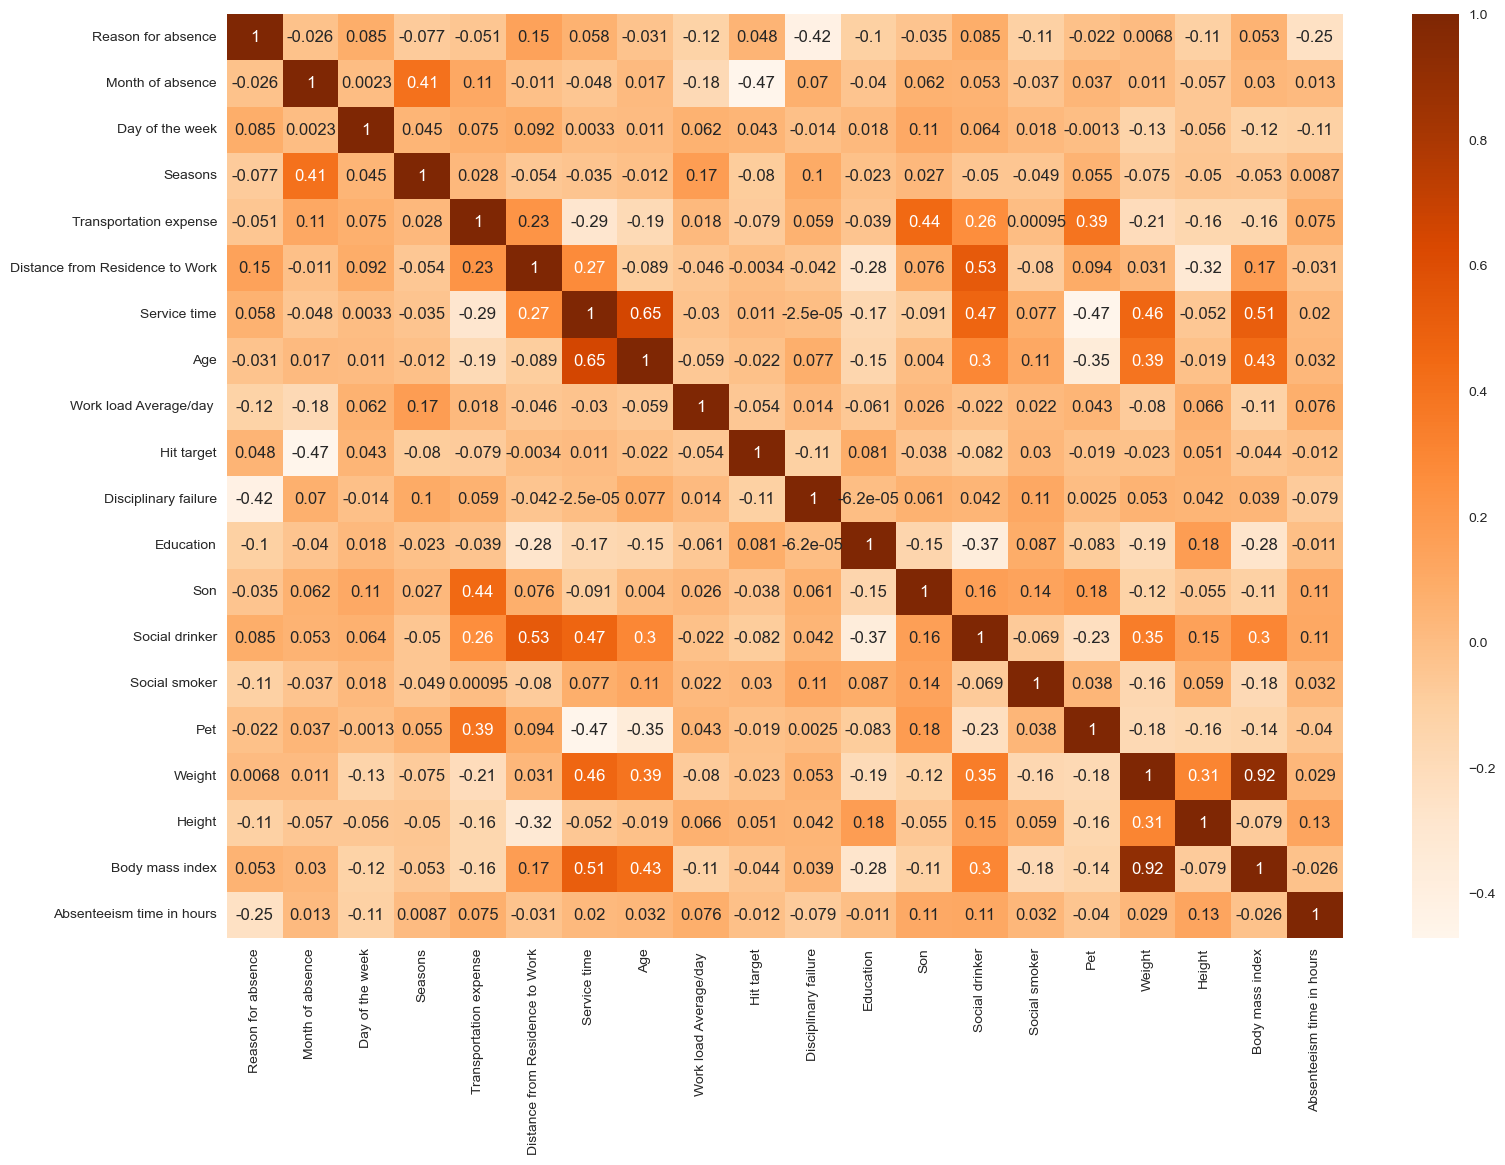

In [43]:
plt.figure(figsize=(18,12))
sns.heatmap(corel_matrix, annot=True, cmap='Oranges')
plt.show()

In [44]:
scale_df.shape

(706, 20)

# Curse of Dimensionality

### PCA

In [45]:
pca = PCA()
pca.fit_transform(scale_df)
features = range(pca.n_components_)
transformed_data = pca.transform(scale_df)

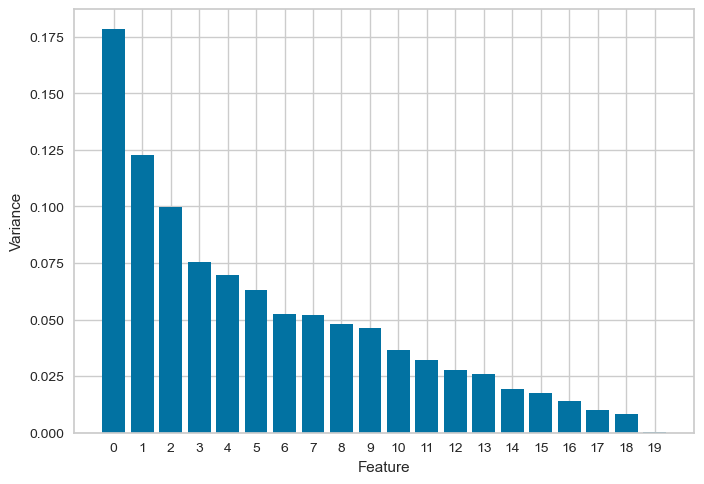

In [46]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

In [47]:
pca2 =  PCA(n_components=2)
transformed_data2 =  pca2.fit_transform(scale_df)
transformed_data2.shape

(706, 2)

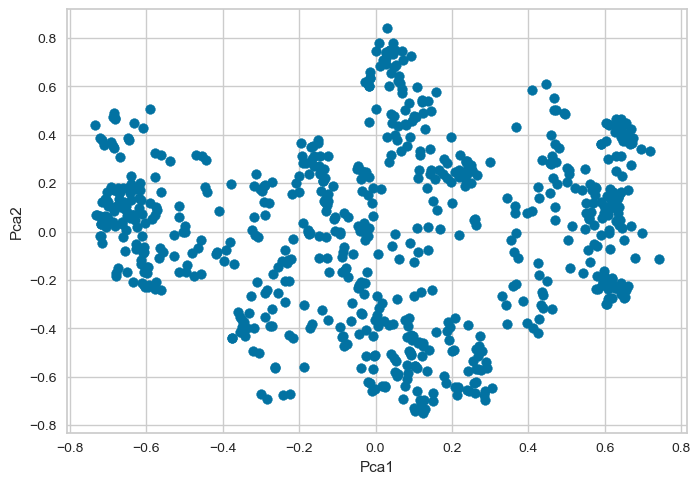

In [48]:
plt.scatter(transformed_data2[:,0], transformed_data2[:,1])
plt.xlabel('Pca1')
plt.ylabel('Pca2')
plt.show()

# K-Means

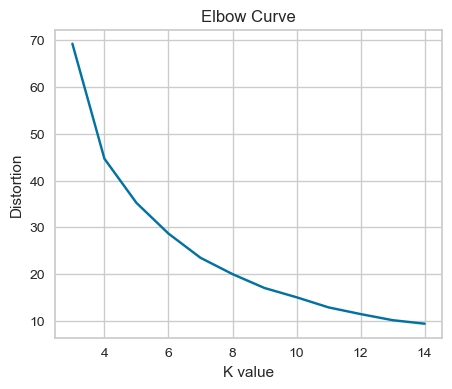

In [49]:
distortion=[]
for i in range(3,15):
    model=KMeans(n_clusters=i).fit(transformed_data2)
    distortion.append(model.inertia_) 
    
plt.figure(figsize=(5,4))
plt.grid(True)
plt.plot(range(3,15),distortion)
plt.ylabel('Distortion')
plt.xlabel('K value')
plt.title("Elbow Curve")
plt.show()

In [50]:
distortion

[69.26340673877954,
 44.66724893793882,
 35.22055597345317,
 28.65134011016116,
 23.470533868691064,
 19.980559767191938,
 17.00373839713599,
 15.024030246186086,
 12.857164702749964,
 11.428255797283994,
 10.123152173938776,
 9.366254416306564]

In [51]:
for i in range(3,15):
    model=KMeans(n_clusters=i).fit(transformed_data2)
    model.predict(transformed_data2)
    score=silhouette_score(transformed_data2,model.labels_,metric="euclidean")
    print("k:",i,"score",score)

k: 3 score 0.44404073670075334
k: 4 score 0.48170346627969884
k: 5 score 0.4550780867071611
k: 6 score 0.44649625508320434
k: 7 score 0.45803713100105825
k: 8 score 0.46346495716730496
k: 9 score 0.4414133270340354
k: 10 score 0.4471619763619796
k: 11 score 0.45792891355994186
k: 12 score 0.473414873263077
k: 13 score 0.46157036345703195
k: 14 score 0.45647295332345983


In [52]:
model_km = KMeans(n_clusters = 4).fit(transformed_data2)

In [53]:
print(model_km.labels_)

[0 3 3 1 0 3 0 0 1 1 0 0 0 3 3 1 3 2 3 2 3 0 0 0 0 0 1 0 3 3 0 1 1 3 0 0 0
 0 0 2 1 3 3 1 1 3 0 0 0 0 2 2 1 0 3 2 3 0 0 3 0 3 1 3 2 3 2 2 3 0 3 2 0 0
 2 0 0 0 3 2 3 2 0 1 2 0 1 2 2 2 0 3 2 0 0 3 1 3 1 2 0 1 0 2 0 2 1 0 2 2 1
 1 1 2 2 2 2 1 2 1 1 1 1 2 0 1 2 0 2 1 3 1 2 0 0 1 1 2 2 2 2 2 2 2 2 2 0 0
 1 1 0 0 2 1 0 1 1 0 1 0 1 0 2 1 3 2 2 2 2 2 3 0 2 1 2 0 2 1 1 1 2 0 3 3 0
 1 0 3 0 0 1 0 0 1 1 0 1 1 3 2 2 1 3 0 0 2 0 1 3 3 0 1 0 1 0 0 3 1 1 3 1 3
 3 0 3 3 2 1 3 1 1 2 2 1 2 2 1 0 0 3 0 0 0 0 1 0 1 0 0 0 0 3 2 2 3 3 1 3 1
 0 2 3 3 0 3 0 0 3 0 3 0 3 0 0 3 3 3 0 0 3 0 1 0 0 3 0 2 1 0 3 2 3 0 0 3 3
 3 0 2 3 0 0 0 1 2 2 3 1 3 3 0 0 0 1 3 2 1 1 1 3 0 0 0 3 0 0 0 0 3 2 3 3 1
 3 0 0 3 3 2 1 1 3 1 0 1 3 0 2 1 1 1 1 3 1 3 3 3 3 1 3 2 0 0 3 3 3 1 3 2 3
 1 0 1 1 1 1 1 0 3 1 1 0 3 0 0 1 3 3 3 1 1 3 3 0 0 1 3 0 2 0 3 2 3 3 3 0 0
 3 1 3 3 0 2 3 0 0 1 1 1 2 2 2 1 1 1 3 1 2 0 3 0 3 1 3 3 3 2 3 3 2 1 2 1 2
 2 0 1 2 1 0 1 0 1 1 2 3 3 0 0 3 0 0 3 1 1 1 0 3 0 3 1 2 1 1 1 0 0 0 1 1 0
 2 3 3 2 2 0 0 3 2 0 3 0 

Text(0.5, 1.0, 'KMeans Cluster')

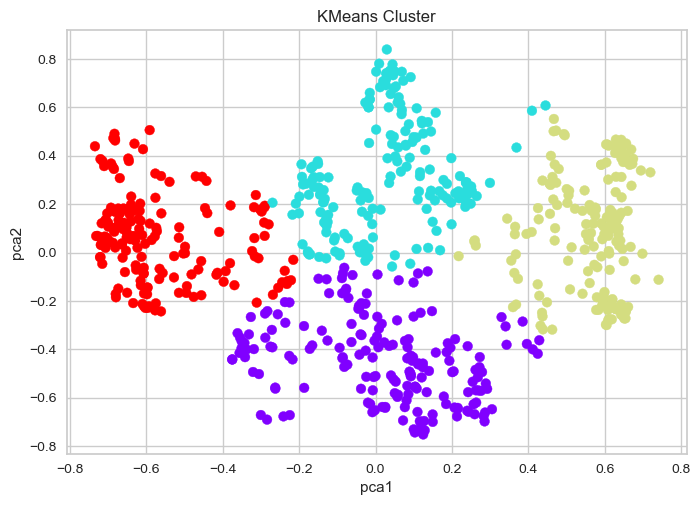

In [54]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=model_km.labels_,cmap='rainbow')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('KMeans Cluster')

## Hierarchical Clustering

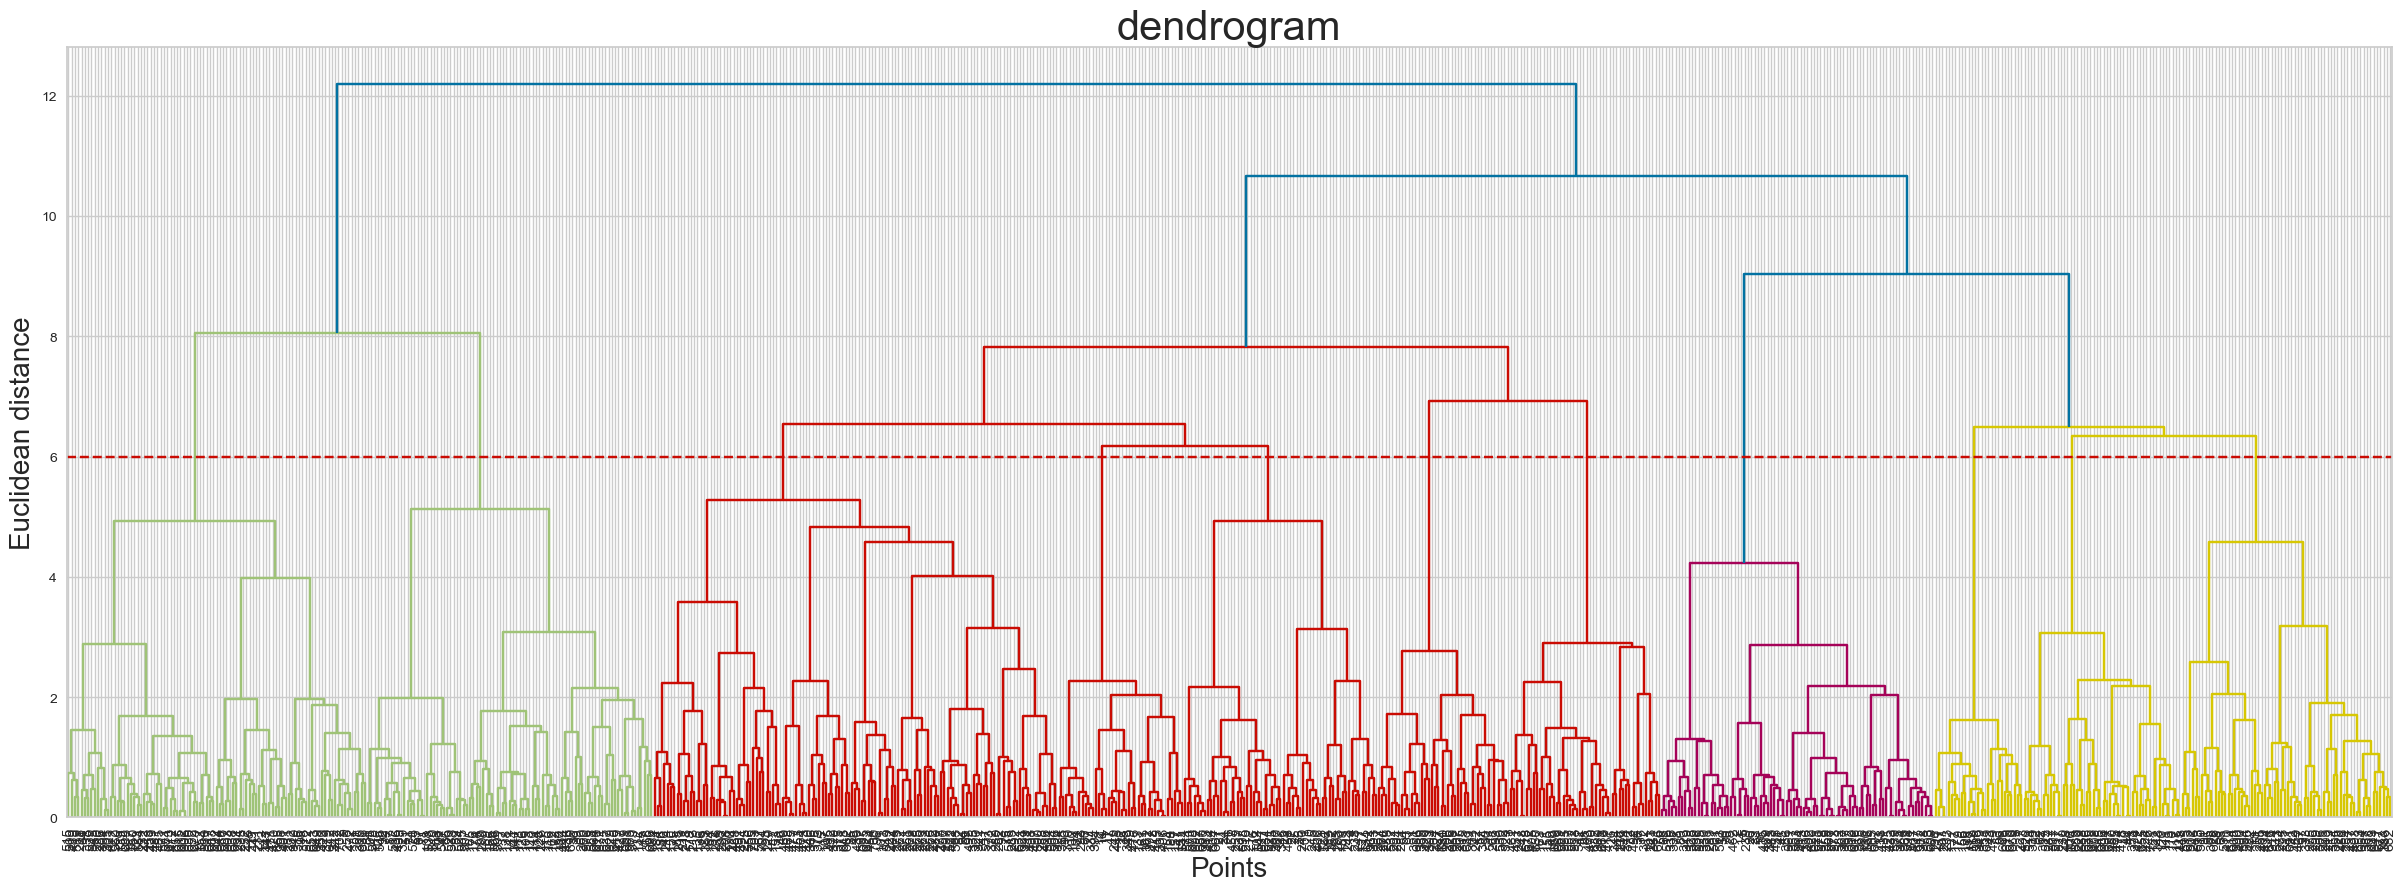

In [103]:
from scipy.cluster.hierarchy import dendrogram,linkage

plt.figure(figsize=(30,10))
dendrogram = dendrogram(linkage(scale_df,method='ward',metric='euclidean'))
plt.axhline(y=6,color='r',linestyle ='--')
ax=plt.gca()
ax.tick_params(axis='x',which='major',labelsize=10)
plt.title('dendrogram',fontsize=30)
plt.xlabel('Points',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)
plt.show()

In [57]:
for i in range(3,15):
    amodel=AgglomerativeClustering(n_clusters=i).fit(transformed_data2)
    amodel.fit_predict(transformed_data2)
    score=silhouette_score(transformed_data2,amodel.labels_,metric="euclidean")
    print("k:",i,"score",score)

k: 3 score 0.3986355314752815
k: 4 score 0.45898401596758354
k: 5 score 0.43424407922299346
k: 6 score 0.4323789912809731
k: 7 score 0.4176831970199007
k: 8 score 0.4276328342338099
k: 9 score 0.42177376070183936
k: 10 score 0.42564006312121155
k: 11 score 0.4266576693451199
k: 12 score 0.4402141737803818
k: 13 score 0.437164745551083
k: 14 score 0.43160864566303897


In [58]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [59]:
y_hc = hc.fit_predict(transformed_data2)

In [60]:
y_hc

array([3, 2, 2, 3, 3, 2, 4, 4, 1, 1, 3, 4, 4, 2, 2, 3, 2, 0, 1, 0, 2, 4,
       4, 3, 4, 3, 3, 3, 2, 2, 3, 1, 3, 2, 4, 3, 3, 3, 4, 0, 1, 2, 2, 1,
       1, 2, 4, 4, 4, 4, 0, 0, 1, 3, 1, 0, 2, 4, 3, 2, 4, 2, 1, 1, 0, 2,
       0, 0, 3, 4, 2, 0, 4, 4, 0, 3, 4, 4, 2, 0, 2, 3, 4, 1, 0, 3, 1, 0,
       3, 0, 4, 3, 0, 3, 4, 3, 1, 2, 1, 0, 4, 1, 4, 0, 4, 0, 1, 3, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 3, 1, 0, 3, 0, 1, 2, 1,
       0, 4, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 1, 1, 3, 4, 0, 3,
       4, 1, 1, 4, 1, 3, 1, 4, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3,
       0, 1, 3, 1, 0, 4, 2, 2, 3, 3, 3, 3, 4, 3, 1, 0, 3, 1, 3, 3, 1, 1,
       2, 0, 0, 1, 2, 3, 3, 0, 0, 3, 2, 2, 4, 3, 4, 3, 3, 3, 2, 1, 3, 2,
       1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 4, 3, 2, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 4, 3, 1, 0, 0, 2, 1, 1, 2, 1, 4, 0, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 2, 2, 4, 3, 2, 3, 1, 3, 3, 1, 3,
       0, 1, 4, 2, 0, 2, 3, 4, 2, 2, 2, 4, 0, 2, 4,

Text(0, 0.5, 'pca2')

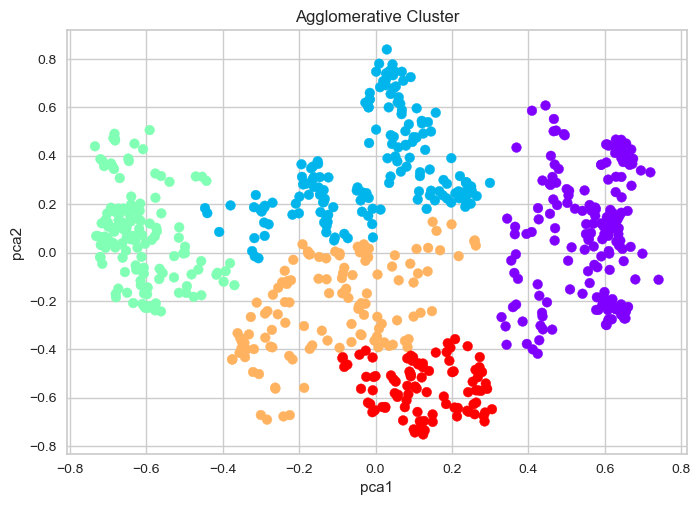

In [61]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=y_hc, cmap = 'rainbow')
plt.title('Agglomerative Cluster')
plt.xlabel('pca1')
plt.ylabel('pca2')

# Density Clustering (DBSCAN)

In [62]:
neighbours=NearestNeighbors(n_neighbors=5)
neigh_fit = neighbours.fit(transformed_data2)
distance, index=neigh_fit.kneighbors(transformed_data2)

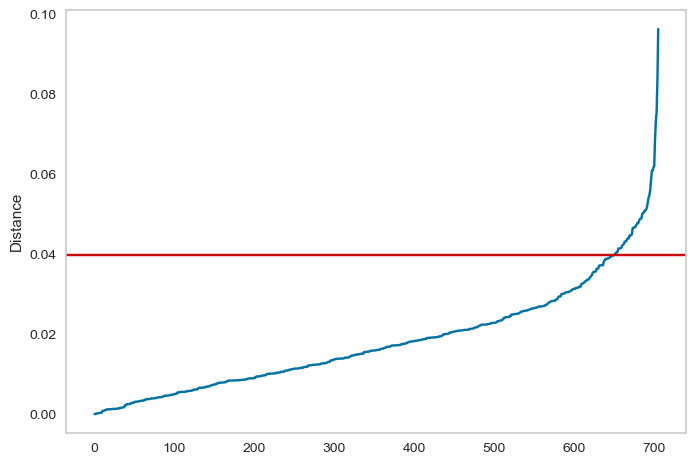

In [104]:
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=0.04,color='r')
plt.grid()
plt.ylabel('Distance')
plt.show()

In [64]:
eps=0.04
for i in range(3,15):
    db=DBSCAN(eps=eps,min_samples=i)
    db.fit(transformed_data2)
    labels=db.labels_
    
    new_labels=labels+2
    y=np.bincount(new_labels)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print('min_sample:',i,'cluster:',cluster)
    score=silhouette_score(transformed_data2,new_labels,metric='euclidean')
    print(f'score = {score}')
    print(' ')

min_sample: 3 cluster: [(1, 103), (2, 13), (3, 3), (4, 85), (5, 11), (6, 26), (7, 36), (8, 24), (9, 35), (10, 10), (11, 3), (12, 4), (13, 33), (14, 3), (15, 8), (16, 27), (17, 4), (18, 9), (19, 65), (20, 7), (21, 15), (22, 3), (23, 6), (24, 28), (25, 5), (26, 22), (27, 4), (28, 5), (29, 5), (30, 3), (31, 9), (32, 4), (33, 4), (34, 4), (35, 3), (36, 3), (37, 4), (38, 3), (39, 3), (40, 6), (41, 5), (42, 6), (43, 3), (44, 4), (45, 3), (46, 4), (47, 6), (48, 6), (49, 3), (50, 5), (51, 6), (52, 4), (53, 3)]
score = 0.15699749959728085
 
min_sample: 4 cluster: [(1, 170), (2, 13), (3, 73), (4, 11), (5, 14), (6, 35), (7, 22), (8, 27), (9, 10), (10, 12), (11, 4), (12, 33), (13, 27), (14, 4), (15, 9), (16, 12), (17, 50), (18, 7), (19, 15), (20, 6), (21, 27), (22, 5), (23, 22), (24, 4), (25, 9), (26, 4), (27, 12), (28, 5), (29, 7), (30, 6), (31, 5), (32, 4), (33, 4), (34, 4), (35, 4), (36, 6), (37, 6), (38, 4), (39, 6), (40, 4), (41, 4)]
score = 0.19361220729719744
 
min_sample: 5 cluster: [(1, 2

In [65]:
db=DBSCAN(eps=eps,min_samples=5)
db.fit(transformed_data2)
labels=db.labels_

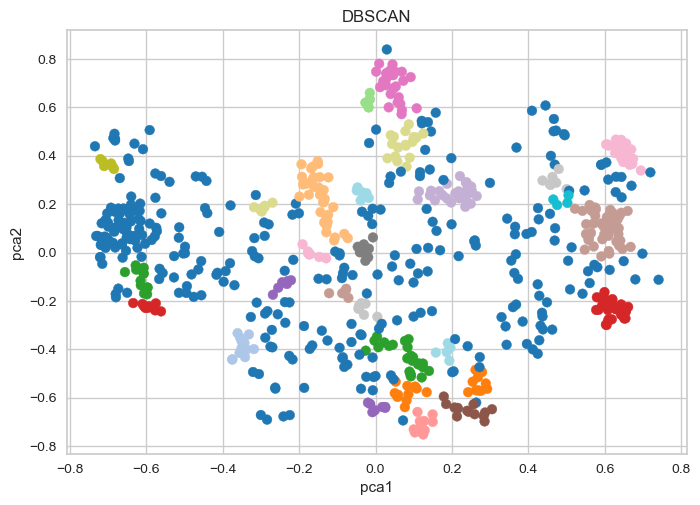

In [66]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=labels,cmap='tab20')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('DBSCAN')
plt.show()

In [67]:
labels

array([ 1, -1,  0, -1,  1,  0,  2,  3,  4, 24,  5,  5,  5,  0,  0, -1,  0,
       -1, -1, -1,  0, 28,  3,  1, -1,  1, -1,  1,  6,  0, -1, 24, -1,  0,
       -1,  1,  5, -1,  3, -1,  7, -1,  0, -1,  7, -1, -1,  3,  5,  5, -1,
        8, 24, -1, -1,  8, -1, 28, -1,  9, 10, -1, 24, -1, 16,  9,  8,  8,
       12, 11, -1,  8, 10, -1,  8, -1, 14, 10,  9,  8,  9, -1, 11,  4, -1,
        5,  4,  8, -1,  8, 10, 12,  8, -1, 11, 12, -1,  0, 13,  8, 10, -1,
       14,  8, 10,  8, -1, 15,  8, 16, 17, 17,  4, 16, 16, 16, 16, 17, 16,
       17, 17, 17, 17, 18, -1, 17, 16, -1, 16, -1,  0,  4, -1,  5, -1, 13,
       13, 16, 16, 18, 16, 16, -1, 21, 16, -1, -1,  5, 13, 13, 22,  5, 18,
       19,  5, 13,  4,  5,  4, -1, 13,  5, 16, -1,  0, 16, 16, 18, 16, 16,
        0, -1, -1, 19, 16,  5, -1,  4, 20,  4, -1,  3,  0, -1,  5, 20,  5,
       -1,  5, -1,  4, -1, -1, -1, 20, -1,  4,  4, -1, -1, 16,  4, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, 20,  2, 20,  5, -1, -1,  4, 20, -1, 13,
       -1, -1, -1, -1,  0

In [73]:
Kmscore=silhouette_score(transformed_data2,model_km.labels_,metric='euclidean')
Hiscore=silhouette_score(transformed_data2,hc.labels_,metric='euclidean')
DBscore=silhouette_score(transformed_data2,db.labels_,metric='euclidean')
print('Silhoute scores')
print('--'*30)
print('Kmean      : ',Kmscore)
print('Hirachical : ',Hiscore)
print('DBSCAN     : ',DBscore)

Silhoute scores
------------------------------------------------------------
Kmean      :  0.48170346627969884
Hirachical :  0.43424407922299346
DBSCAN     :  0.07235607328295927


In [86]:
model_list=["KMeans Clustering","Hierarchical Clustering","DBSCAN Clustering"]
metric_list=[0.48170346627969884, 0.43424407922299346, 0.07235607328295927 ]

In [87]:
total_score = pd.DataFrame(columns=("Models", "Silhoute scores"))

,Models,Silhoute scores


In [88]:
total_score['Models'] = model_list

In [89]:
total_score['Silhoute scores'] = metric_list

In [90]:
total_score

,Models,Silhoute scores
0,KMeans Clustering,0.481703
1,Hierarchical Clustering,0.434244
2,DBSCAN Clustering,0.072356


In [91]:
a = model_km.labels_
a

array([0, 3, 3, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 3, 3, 1, 3, 2, 3, 2, 3, 0,
       0, 0, 0, 0, 1, 0, 3, 3, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 1, 3, 3, 1,
       1, 3, 0, 0, 0, 0, 2, 2, 1, 0, 3, 2, 3, 0, 0, 3, 0, 3, 1, 3, 2, 3,
       2, 2, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 3, 2, 3, 2, 0, 1, 2, 0, 1, 2,
       2, 2, 0, 3, 2, 0, 0, 3, 1, 3, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 3, 1,
       2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 3, 2, 2, 2, 2, 2, 3, 0, 2, 1, 2, 0,
       2, 1, 1, 1, 2, 0, 3, 3, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       3, 2, 2, 1, 3, 0, 0, 2, 0, 1, 3, 3, 0, 1, 0, 1, 0, 0, 3, 1, 1, 3,
       1, 3, 3, 0, 3, 3, 2, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 3, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 2, 2, 3, 3, 1, 3, 1, 0, 2, 3, 3, 0,
       3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 1, 0, 0, 3, 0,
       2, 1, 0, 3, 2, 3, 0, 0, 3, 3, 3, 0, 2, 3, 0,

In [92]:
cp_df = df.copy()

In [93]:
cp_df['Clusters']=a

In [94]:
cp_df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Clusters
0,26,7,3,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,4,0
1,0,7,3,1,118,13,18,50,239.554,97,...,1,1,1,0,0,98,178,31,0,3
2,23,7,4,1,179,51,18,38,239.554,97,...,1,0,1,0,0,89,170,31,2,3
3,7,7,5,1,279,5,14,39,239.554,97,...,1,2,1,1,0,68,168,24,4,1
4,23,7,5,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,...,1,2,1,0,1,90,172,30,8,0
736,11,7,3,1,235,11,14,37,264.604,93,...,3,1,0,0,1,88,172,29,4,1
737,0,0,3,1,118,14,13,40,271.219,95,...,1,1,1,0,8,98,170,34,0,1
738,0,0,4,2,231,35,14,39,271.219,95,...,1,2,1,0,2,100,170,35,0,3


In [95]:
cp_df['Clusters'].value_counts()

0    188
1    177
3    176
2    165
Name: Clusters, dtype: int64

In [96]:
clust_0 = cp_df[cp_df['Clusters'] == 0] 

In [97]:
clust_1 = cp_df[cp_df['Clusters'] == 1] 

In [98]:
clust_2 = cp_df[cp_df['Clusters'] == 2] 

In [99]:
clust_3 = cp_df[cp_df['Clusters'] == 3] 

In [100]:
clust_0

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Clusters
0,26,7,3,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,4,0
4,23,7,5,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,2,0
6,22,7,6,1,361,52,3,28,239.554,97,...,1,1,1,0,4,80,172,27,8,0
7,23,7,6,1,260,50,11,36,239.554,97,...,1,4,1,0,0,65,168,23,4,0
10,1,7,2,1,260,50,11,36,239.554,97,...,1,4,1,0,0,65,168,23,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,22,6,5,3,378,49,11,36,275.089,96,...,1,2,0,1,4,65,174,21,8,0
718,28,6,5,3,291,31,12,40,275.089,96,...,1,1,1,0,1,73,171,25,2,0
732,22,7,4,1,361,52,3,28,264.604,93,...,1,1,1,0,4,80,172,27,8,0
734,13,7,2,1,369,17,12,31,264.604,93,...,1,3,1,0,0,70,169,25,80,0


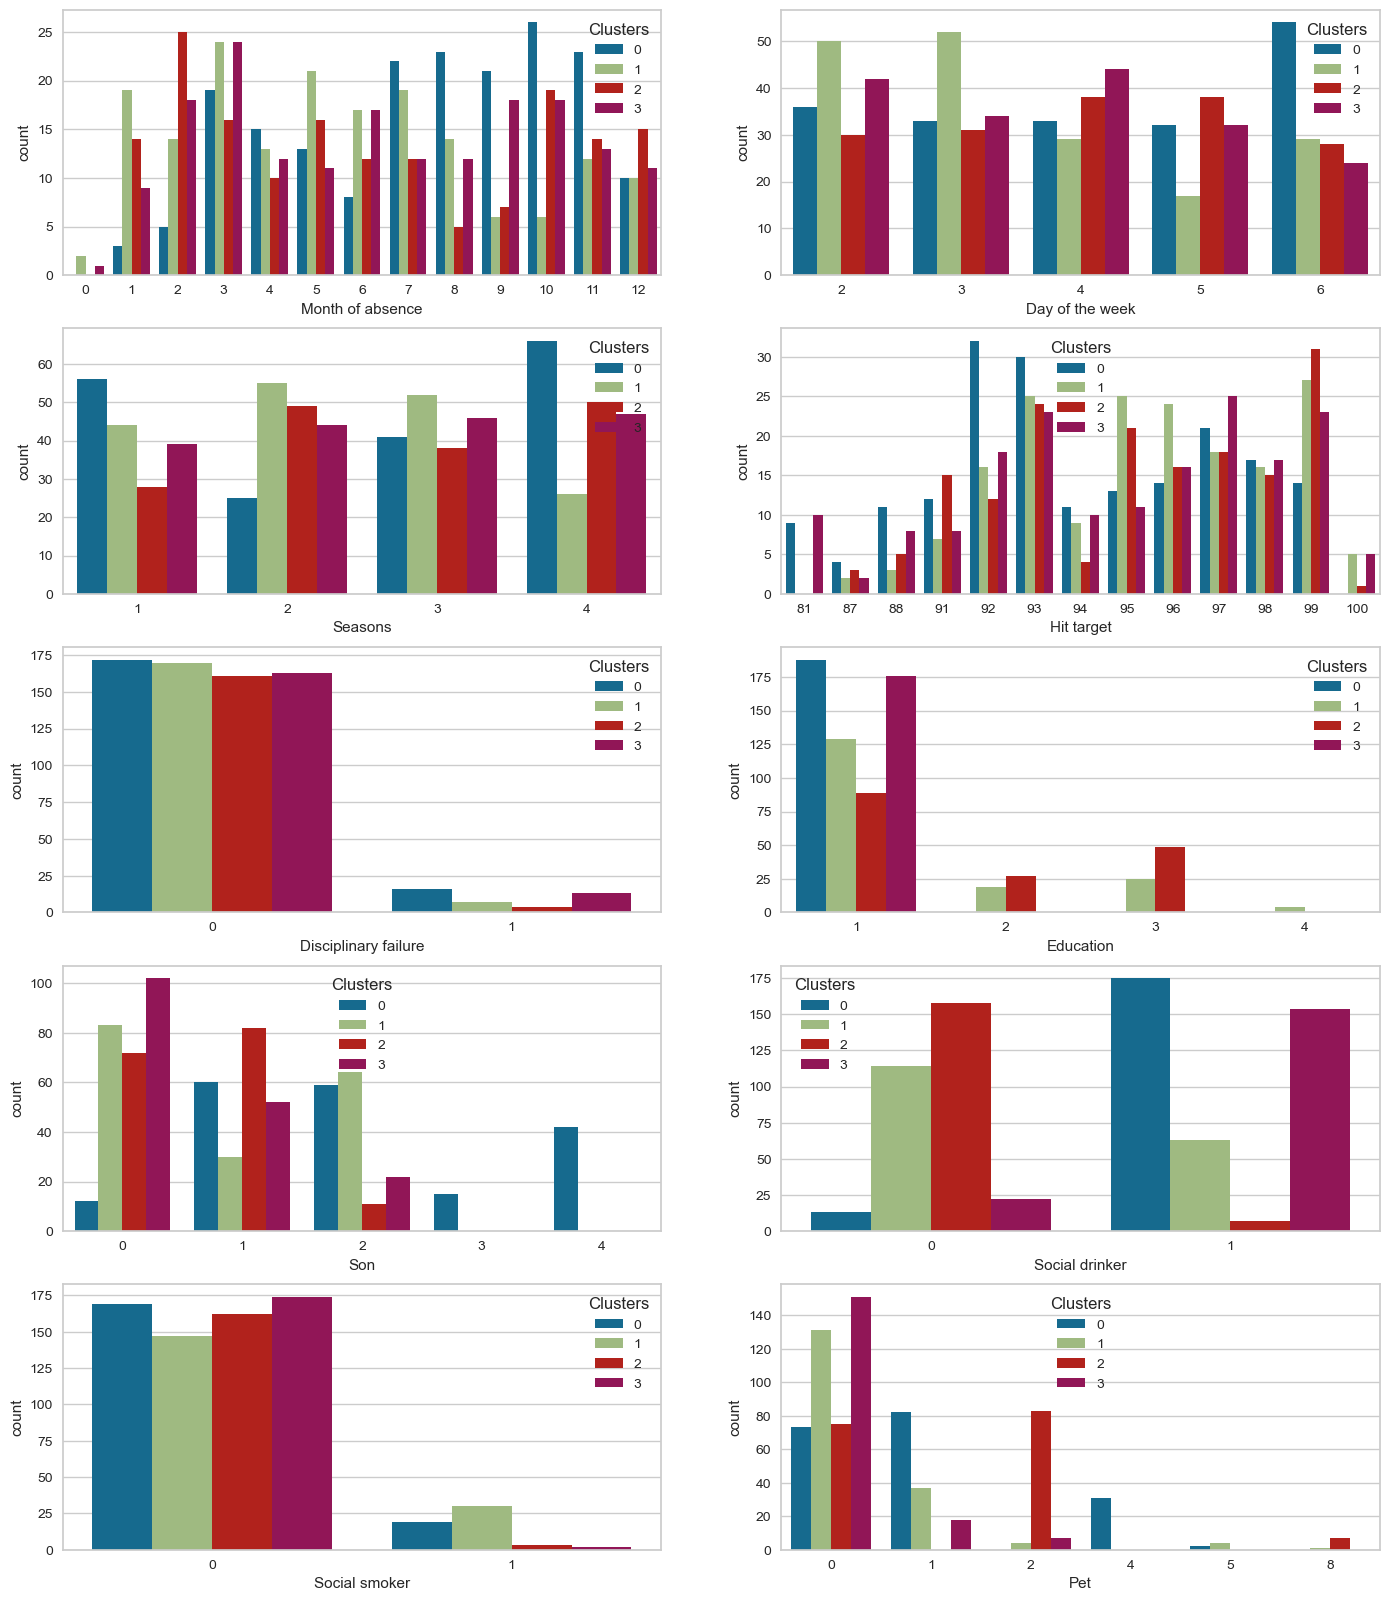

In [101]:
fig, ax = plt.subplots(5,2, figsize = (17,20))
ax = ax.ravel()
for i,j in zip(cat_var, range(len(cat_var))):
    sns.countplot(data=cp_df, x = i, hue = 'Clusters', ax = ax[j])

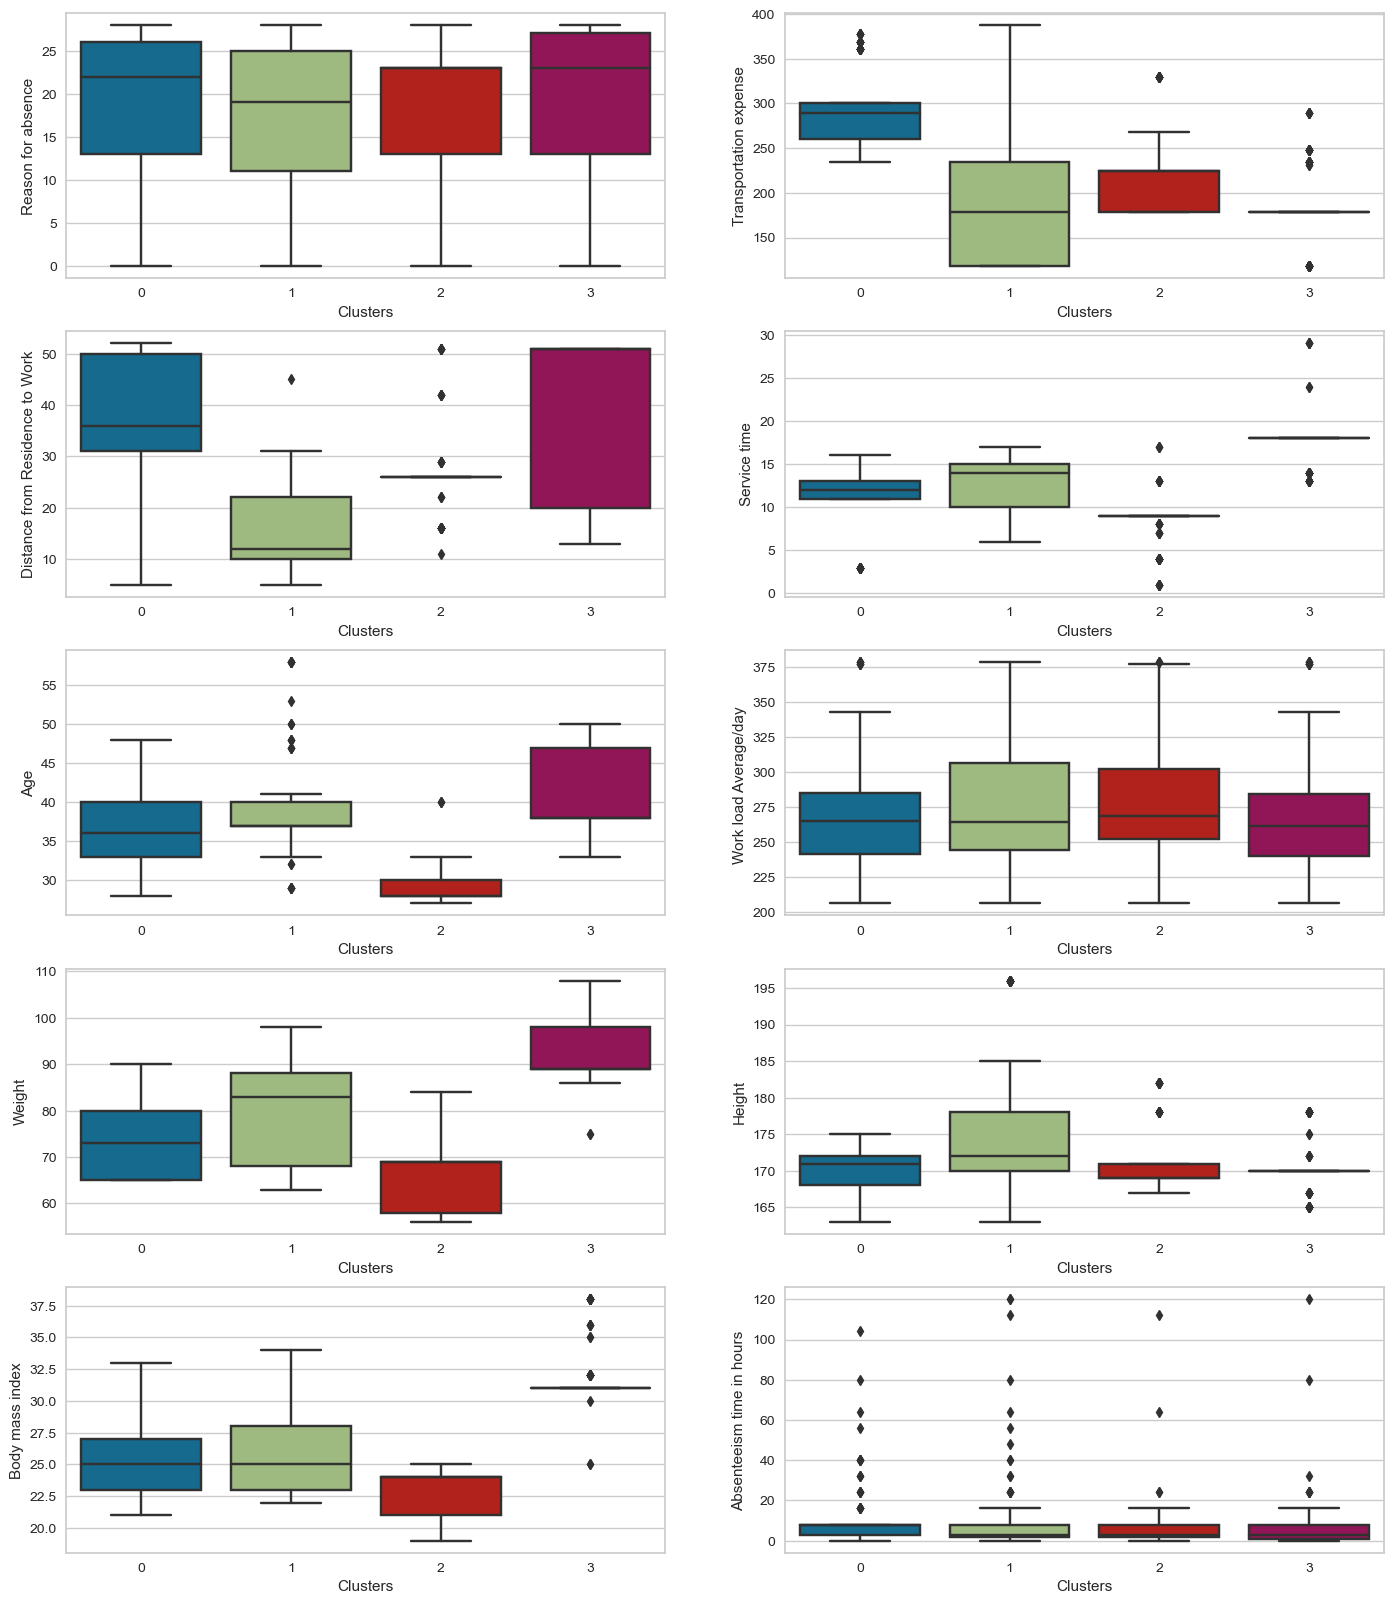

In [102]:
fig, ax = plt.subplots(5,2, figsize = (17,20))
ax = ax.ravel()
for i,j in zip(num_var, range(len(num_var))):
    sns.boxplot(data=cp_df, y = i, x = 'Clusters', ax = ax[j])

### Cluster 0 in the dataset:

Mostly, Cluster 0 exhibited remarkable qualities. With a target achievement rate of 99% and discipline similar to cluster 2, most members had one educational degree, one child, and were non-drinkers and non-smokers. Intriguingly, they owned two pets and had transportation expenses within a specific range. Additionally, their age ranged from 30 to 35, and they maintained a BMI between 20 and 25.

### Cluster 1 in the dataset:

Mostly, Cluster 1 showcased distinctive patterns. Absences were highest in the 3rd month, followed by the 4th, predominantly on the 3rd and 2nd weekdays. For seasons, the 2nd and 3rd had the most absences. Members in this cluster, aged between 35 and 40, achieved their targets predominantly in the range of 92-99%. Their BMI ranged from 22 to 28, reflecting a moderate level of health and fitness.

### Cluster 2 in the dataset:

Mostly, Cluster 2 had higher absences in the 3rd and 9th months, particularly on the 4th and 3rd weekdays. Target achievement was primarily in the range of 92-93%. Age ranged from 35 to 50, and weight was between 85 and 100. Notably, there was a specific season with the lowest absence count compared to other seasons.

### Cluster 3 in the dataset:

Mostly, Cluster 3 in the dataset had high absences in the 10th and 11th months, with the maximum on the 6th day of the week. Season 4 and season 1 had the highest number of absences. The age range was 30-45, and the weight range was 60-80.